In [2]:
""" Dataset utilizado para la regresión Logistica: Heart Disease Cleveland UCI 
Contiene información de pacientes como edad, sexo, presión sanguínea, colesterol, etc. la variable objetivo es la presencia de enfermedad 
cardíaca. """

' Dataset utilizado para la regresión Logistica: Heart Disease Cleveland UCI \nContiene información de pacientes como edad, sexo, presión sanguínea, colesterol, etc. la variable objetivo es la presencia de enfermedad \ncardíaca. '

In [132]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Se ingresa la ruta de el archivo y se carga
data = pd.read_csv("./heart_cleveland_upload.csv")

# Verificar las dimensiones del Dataset resultante
print("Dimensiones del Dataset:", data.shape)


Dimensiones del Dataset: (297, 14)


In [133]:
# Paso 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc. 

# Mostrar una muestra aleatoria de filas del Dataset
sample_data = data.sample(min(100, len(data)))  # Muestra aleatoria de hasta 100 filas
sample_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
131,48,1,2,124,255,1,0,175,0,0.0,0,2,0,0
22,34,1,0,118,182,0,2,174,0,0.0,0,0,0,0
21,38,1,0,120,231,0,0,182,1,3.8,1,0,2,1
70,34,0,1,118,210,0,0,192,0,0.7,0,0,0,0
152,39,0,2,94,199,0,0,179,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,60,1,3,145,282,0,2,142,1,2.8,1,2,2,1
105,57,1,2,150,126,1,0,173,0,0.2,0,1,2,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0
271,47,1,3,112,204,0,0,143,0,0.1,0,0,0,0


In [134]:
data.describe()  # Muestra estadísticas descriptivas

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [135]:
data.head()     # Muestra las primeras 5 filas del dataSet

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [136]:
# Paso 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

# Filtra las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number]) 

# Identifica las columnas que contienen al menos un cero
columns_with_zeros = data.columns[(numeric_data == 0).any()].tolist()

print("Columnas numéricas con al menos un cero:", columns_with_zeros)

Columnas numéricas con al menos un cero: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition']


In [137]:
# La columna thal es la unicas que no deberian tener valores en cero, por lo que se remplazan con la media. 

mean_thal = data.loc[data['thal'] != 0, 'thal'].mean()
data['thal'] = data['thal'].replace(0, mean_thal)


In [138]:
# Verificar si la operación fue exitosa 

print(data['thal'].describe())

count    297.000000
mean       1.864662
std        0.229305
min        1.000000
25%        1.864662
50%        1.864662
75%        2.000000
max        2.000000
Name: thal, dtype: float64


In [139]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,1.864662,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,1.864662,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,1.864662,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,1.864662,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,1.864662,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2.000000,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2.000000,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2.000000,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,1.864662,0


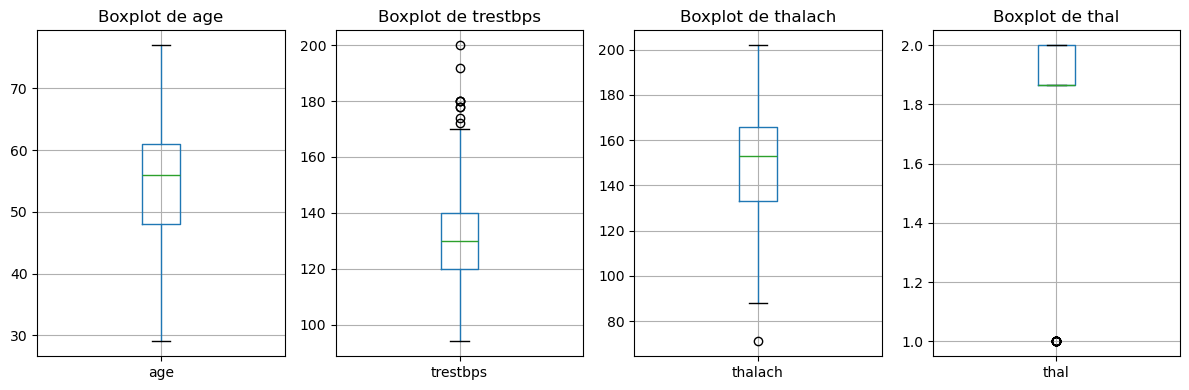

In [140]:
# Identificando datos atipicos 

# Nombres de las columnas para los gráficos de caja
columns = ['age', 'trestbps',  'thalach', 'thal']
titles = ['Boxplot de age', 'Boxplot de trestbps',  'Boxplot de thalach', 'Boxplot de thal']

plt.figure(figsize=(12, 4))

# Crear un gráfico de caja para cada columna
for i, (column, title) in enumerate(zip(columns, titles), start=1):
    plt.subplot(1, 4, i)
    data.boxplot(column=column)
    plt.title(title)

plt.tight_layout()
plt.show()


In [141]:
# luego de la visualización se crean los rangos que definen que es atipico o no. 

variables = {
    'age': (0, 75),       
    'trestbps': (50, 180),   
    'thalach': (80, 170),
    'thal': (0,7)
}

# Calcular los datos atípicos

for variable, (min_level, max_level) in variables.items():
    atypical = data[(data[variable] < min_level) | (data[variable] > max_level)]
    total_atypical = atypical.shape[0]
    percentage = (total_atypical / data.shape[0]) * 100  # Cálculo del porcentaje de datos atípicos
    print(f"Datos atípicos en {variable}: {total_atypical}, {percentage:.2f}% del total")


Datos atípicos en age: 2, 0.67% del total
Datos atípicos en trestbps: 2, 0.67% del total
Datos atípicos en thalach: 57, 19.19% del total
Datos atípicos en thal: 0, 0.00% del total


In [142]:
# Borrar los datos atipicos del dataset

for variable, (nivel_minimo, nivel_maximo) in variables.items():
    data = data[(data[variable] < nivel_maximo) & (data[variable] > nivel_minimo)]

In [143]:
# Calcular los datos atípicos nuevamente, para verificar que fueron eliminados

for variable, (min_level, max_level) in variables.items():
    atypical = data[(data[variable] < min_level) | (data[variable] > max_level)]
    total_atypical = atypical.shape[0]
    percentage = (total_atypical / data.shape[0]) * 100  # Cálculo del porcentaje de datos atípicos
    print(f"Datos atípicos en {variable}: {total_atypical}, {percentage:.2f}% del total")

Datos atípicos en age: 0, 0.00% del total
Datos atípicos en trestbps: 0, 0.00% del total
Datos atípicos en thalach: 0, 0.00% del total
Datos atípicos en thal: 0, 0.00% del total


In [144]:
# De esta forma queda el dataset sin valores atipicos

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        229 non-null    int64  
 1   sex        229 non-null    int64  
 2   cp         229 non-null    int64  
 3   trestbps   229 non-null    int64  
 4   chol       229 non-null    int64  
 5   fbs        229 non-null    int64  
 6   restecg    229 non-null    int64  
 7   thalach    229 non-null    int64  
 8   exang      229 non-null    int64  
 9   oldpeak    229 non-null    float64
 10  slope      229 non-null    int64  
 11  ca         229 non-null    int64  
 12  thal       229 non-null    float64
 13  condition  229 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 26.8 KB


In [145]:
# Punto 3. Seleccionar las características más relevantes para entrenar el  modelo utilizando selección de características

# Variable dependiente y necesaria para las predicciones. 
data['condition'].value_counts()
data['condition'].head(30)

0     0
1     0
2     0
4     0
5     0
6     0
7     1
9     0
10    1
11    1
12    1
13    0
14    0
17    0
18    1
23    0
24    0
25    0
26    1
28    1
29    0
30    0
31    1
32    1
34    1
35    1
36    0
37    0
39    0
40    0
Name: condition, dtype: int64

In [146]:
#  Paso 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

# se realiza Train 80%, Y Test 20%

# Preparar los datos de entrada (X) y salida (Y)
X = data.drop("condition",axis=1) # Datos de entrada solo con las características seleccionadas
Y = data["condition"]    # Datos de salida (precio de venta)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=0)

# Mostrar las dimensiones de los conjuntos para verificar su correcta división
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de Y_train:", Y_train.shape)
print("Tamaño de Y_test:", Y_test.shape)

Tamaño de X_train: (183, 13)
Tamaño de X_test: (46, 13)
Tamaño de Y_train: (183,)
Tamaño de Y_test: (46,)


In [147]:
# Paso 5. Entrenar el modelo configurando los diferentes hiperparámetros.

# Crear y entrenar el modelo de regresión logistica

regresion = LogisticRegression(solver = "liblinear") 
regresion.fit(X_train, Y_train)  # Entrenamiento del modelo

# Realizar predicciones con el modelo entrenado sobre el conjunto de prueba
prediccion = regresion.predict(X_test)


In [148]:
print(Y_test)

192    1
259    1
174    1
244    1
194    1
135    0
277    1
111    0
283    1
226    1
198    1
162    1
95     0
10     1
182    1
191    0
143    0
6      0
67     0
214    1
235    1
159    1
269    1
273    1
160    1
94     0
207    0
52     1
14     0
196    1
237    1
189    1
248    1
85     0
129    1
26     1
23     0
238    1
9      0
136    1
266    0
126    1
199    1
187    1
271    0
263    1
Name: condition, dtype: int64


In [149]:
print(prediccion)

[1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 1 0 1]


In [150]:
# Paso 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

print(classification_report(Y_test, prediccion))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.93      0.84      0.88        31

    accuracy                           0.85        46
   macro avg       0.83      0.85      0.83        46
weighted avg       0.86      0.85      0.85        46



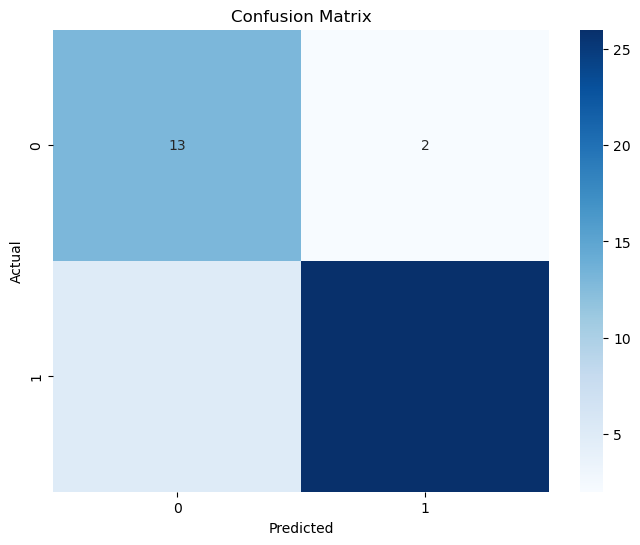

In [151]:
# Paso 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

# Calcula la matriz de confusión
cm = confusion_matrix(Y_test, prediccion)

# Visualiza la matriz de confusión

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


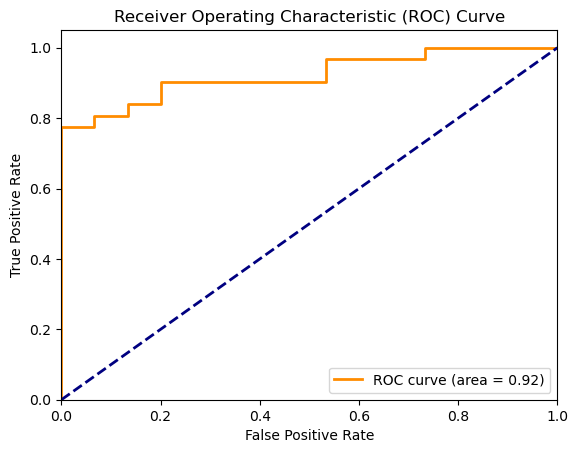

In [156]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades predichas para la clase positiva
probabilidades = regresion.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(Y_test, probabilidades)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


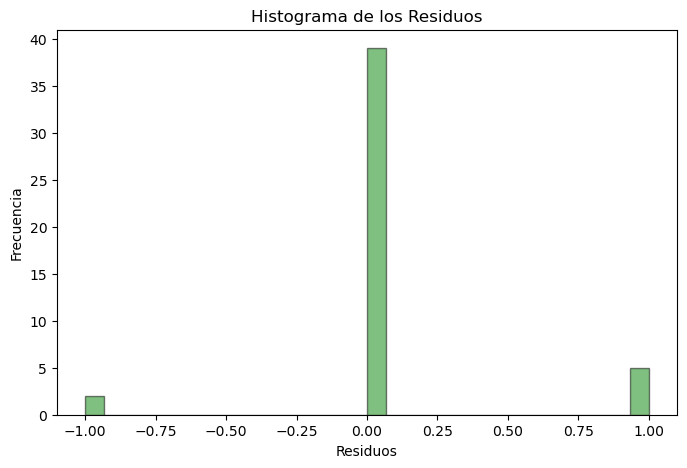

In [153]:
# Historigrama de los residuos

residuos = Y_test - prediccion

plt.figure(figsize=(8, 5))
plt.hist(residuos, bins=30, alpha=0.5, color='green', edgecolor='black')
plt.title('Histograma de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.show()


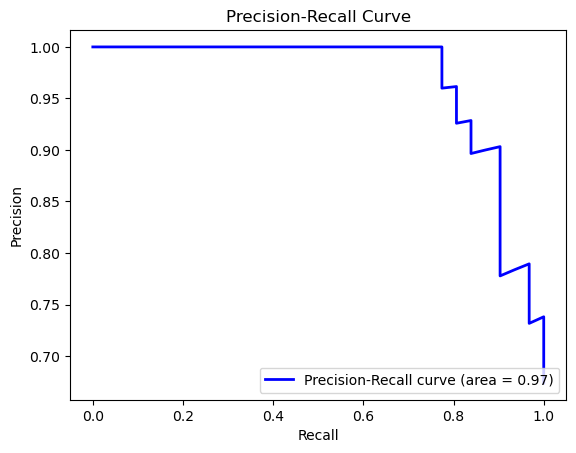

In [159]:
from sklearn.metrics import precision_recall_curve, auc

# Obtener las probabilidades predichas para la clase positiva
probabilidades = regresion.predict_proba(X_test)[:, 1]

# Calcular la precisión, el recall y los umbrales
precision, recall, thresholds = precision_recall_curve(Y_test, probabilidades)

# Calcular el área bajo la curva PR (AUC)
pr_auc = auc(recall, precision)

# Graficar la curva de precisión y recall
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()
